In [1]:
#참고: 같은노래라도 앨범명이 다르면 다르게 저장됨. 
import pandas as pd
data_df = pd.read_csv("song_artist_genre_tags_id.csv")
data_df.drop(['Unnamed: 0'], axis='columns', inplace=True)
data_df

,song_gn_gnr_basket,song_name,artist_name_basket,top_tags,id
0,['GN0900'],Feelings,['Various Artists'],"['비오는날', '추억', '회상', '드라이브', '겨울']",0
1,['GN0900'],Feelings,['Various Artists'],"['비오는날', '추억', '회상', '드라이브', '겨울']",261506
2,['GN0900'],Solsbury Hill (Remastered 2002),['Peter Gabriel'],['록'],2
3,['GN1000'],Solsbury Hill (Remastered 2002),['Peter Gabriel'],['록'],695386
4,['GN1100'],Feeling Right (Everything Is Nice) (Feat. Popc...,['Matoma'],"['기분전환', '클럽', '운동', '드라이브', '듣기좋은', '불금', '페스...",3
...,...,...,...,...,...
572580,['GN1500'],밤차 (Feat. 신민아),['조승우와 데블스'],"['아카데미', '감동적인', '시카고', '영화음악', '맘마미아', '주디']",707982
572581,['GN1700'],Everyday I Have the Blues,"['Van Morrison', 'Joey De Francesco']","['재즈추천', '원더풀재즈', '황덕호', '재즈']",707983
572582,['GN2000'],Coffin For Head Of State,['Fela Kuti'],['월드뮤직'],707984
572583,['GN0100'],스치듯 안녕,['윤종신'],"['발라드', '잔잔한', '이별', '추억', '감성', '드라이브', '윤종신'...",707986


In [2]:
#리스트안에 문자열
import re
content = data_df["song_gn_gnr_basket"]
a=[]
for i in range(0,len(content)):
    parse = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','', content[i])
    a.insert(i,parse) #누적

In [39]:
(a)

['GN0900',
 'GN0900',
 'GN0900',
 'GN1000',
 'GN1100',
 'GN1800',
 'GN1700',
 'GN1600',
 'GN1600',
 'GN0100',
 'GN1200',
 'GN1300',
 'GN1700',
 'GN2700 GN1100',
 'GN2700 GN1100',
 'GN1600',
 'GN1600',
 'GN0900',
 'GN2500 GN0200',
 'GN2500 GN1500 GN0200',
 'GN2800',
 'GN0500 GN0800',
 'GN1600',
 '',
 'GN0900',
 'GN0900',
 'GN1600',
 'GN1100',
 'GN0900',
 'GN0900',
 'GN1900',
 'GN0900',
 'GN1500',
 'GN0100',
 'GN0700',
 'GN2500 GN1500 GN0200',
 'GN1800',
 'GN1500',
 'GN2600',
 'GN1100',
 'GN1100',
 'GN0500 GN0800',
 'GN1500',
 'GN1700',
 'GN1300',
 'GN1000',
 'GN1700',
 'GN1000',
 'GN1000',
 'GN1000',
 'GN1400',
 'GN1000',
 'GN1000',
 'GN1000',
 'GN1000',
 'GN2000',
 'GN1000',
 'GN0500 GN0300',
 'GN0800',
 'GN0800',
 'GN0800',
 'GN0800',
 'GN0800',
 'GN0800',
 'GN0800',
 'GN0800',
 'GN0800',
 'GN0100',
 'GN1000',
 'GN1000',
 'GN1000',
 'GN2800',
 'GN2100',
 'GN2100',
 'GN2100',
 'GN2100',
 'GN0100',
 'GN1100',
 'GN0900 GN1000',
 'GN0900',
 'GN1300',
 'GN1300',
 'GN0200',
 'GN2200',
 'GN0

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
# 군집화 할 그룹의 갯수 정의(장르 갯수=30개)
n_clusters = 13
    
# CountVectrizer로 토큰화. 묶음안에서도 개별로 확인가능.
vectorizer = CountVectorizer()  #각 내부 분리해서 적용됨. 문자열마다 벡터 추출
X = vectorizer.fit_transform(a)

# # l2 정규화
# X = normalize(X)

In [5]:
print(X)
#0은 행, 8은 feature 인덱스, 숫자는 그 feature의 term count 값을 의미
#feature(token or term)이 문서에 몇 번씩 나왔는지 확인

  (0, 8)	1
  (1, 8)	1
  (2, 8)	1
  (3, 9)	1
  (4, 10)	1
  (5, 17)	1
  (6, 16)	1
  (7, 15)	1
  (8, 15)	1
  (9, 0)	1
  (10, 11)	1
  (11, 12)	1
  (12, 16)	1
  (13, 10)	1
  (13, 26)	1
  (14, 10)	1
  (14, 26)	1
  (15, 15)	1
  (16, 15)	1
  (17, 8)	1
  (18, 24)	1
  (18, 1)	1
  (19, 24)	1
  (19, 1)	1
  (19, 14)	1
  :	:
  (572563, 2)	1
  (572564, 11)	1
  (572565, 8)	1
  (572566, 24)	1
  (572566, 1)	1
  (572567, 0)	1
  (572568, 16)	1
  (572569, 2)	1
  (572570, 19)	1
  (572571, 10)	1
  (572571, 26)	1
  (572572, 12)	1
  (572573, 0)	1
  (572574, 3)	1
  (572575, 8)	1
  (572576, 13)	1
  (572577, 12)	1
  (572578, 3)	1
  (572579, 14)	1
  (572579, 21)	1
  (572580, 14)	1
  (572581, 16)	1
  (572582, 19)	1
  (572583, 0)	1
  (572584, 5)	1


In [31]:
#featurer값 확인
features = vectorizer.get_feature_names()

for feature in features:
    print(feature)

gn0100
gn0200
gn0300
gn0400
gn0500
gn0600
gn0700
gn0800
gn0900
gn1000
gn1100
gn1200
gn1300
gn1400
gn1500
gn1600
gn1700
gn1800
gn1900
gn2000
gn2100
gn2200
gn2300
gn2400
gn2500
gn2600
gn2700
gn2800
gn2900
gn9000


In [45]:
#각 단어의 인덱스가 어떻게 부여되었는지 확인
print(vectorizer.vocabulary_['gn1600']) 

15


In [47]:
# words = vectorizer.get_feature_names()
# for word in words: print(word)

for key in vectorizer.vocabulary_: 
    print(key, vectorizer.vocabulary_[key])
    
res = sorted([vectorizer.vocabulary_.items])  #각 단어에 인덱스가 부여된 것.

gn0900 8
gn1000 9
gn1100 10
gn1800 17
gn1700 16
gn1600 15
gn0100 0
gn1200 11
gn1300 12
gn2700 26
gn2500 24
gn0200 1
gn1500 14
gn2800 27
gn0500 4
gn0800 7
gn1900 18
gn0700 6
gn2600 25
gn1400 13
gn2000 19
gn0300 2
gn2100 20
gn2200 21
gn0600 5
gn0400 3
gn2900 28
gn9000 29
gn2300 22
gn2400 23


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


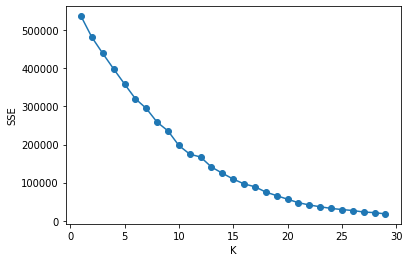

In [30]:
# # k-means 알고리즘 적용 [엘버우 기법]으로 클러스터 갯수 찾기
# # kmeans = KMeans(n_clusters=n_clusters).fit(X)
# %matplotlib inline
# from matplotlib import pyplot as plt
# def elbow(X):
#     sse = []
#     for i in range(1,30):
#         km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
#         print(i)
#         km.fit(X)
#         sse.append(km.inertia_)

#     plt.plot(range(1,30), sse, marker='o')
#     plt.xlabel('K')
#     plt.ylabel('SSE')
#     plt.show()

# elbow(X) 

In [6]:
kmeans = KMeans(n_clusters=n_clusters).fit(X)

# trained labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [7]:
len(labels)

572585

In [8]:
# labels에 merge
data_df['labels']=labels

In [10]:
data_df[data_df['labels']==12]

,song_gn_gnr_basket,song_name,artist_name_basket,top_tags,id,labels
9,['GN0100'],"사랑, 그대라는 멜로디",['진호'],"['발라드', '감성', '위로']",9,12
33,['GN0100'],창밖에 잠수교가 보인다,['박영민'],"['발라드', '트로트', '사랑', '설렘']",125016,12
67,['GN0100'],야상곡 (My Nocturne 2St.),['이승조'],"['이별에', '죽음과']",49,12
76,['GN0100'],있어줄래,['길구봉구'],"['감성', '발라드', '카페', '잔잔한', '드라이브', '사랑', '휴식',...",54,12
84,['GN0100'],논현 Nonhyeon (Feat. 최재문 Trombone),"['어반 나이트 서울 (Urban Night Seoul)', 'FM43']","['기분전환', '드라이브', '가을']",60,12
...,...,...,...,...,...,...
572532,['GN0100'],난 그댈 보면서 (With 이소라),['조규찬'],"['발라드', '추억', '이별', '락', '슬픔', '회상', '애절', '서정...",707896,12
572541,['GN0100'],Always be there,['브라운 아이드 소울'],"['발라드', '사랑', '휴식', '새벽', '힐링', '감성', '밤', '추억...",707913,12
572567,['GN0100'],너를 그리워해,['토요'],"['사랑', '발라드']",707957,12
572573,['GN0100'],가을 우체국 앞에서,['어쿠스틱 콰이어'],"['힐링', '휴식', '가을']",707967,12


In [11]:
data_df.to_csv('data.csv')